In [30]:
#These project is used to predic the gold price
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
gld = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\ML project\Project_7\gld_price_data.csv')

In [32]:
gld.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [33]:
gld.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [34]:
gld.shape

(2290, 6)

In [35]:
gld.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [36]:
gld.drop(columns='Date',axis=1)

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [42]:
correlation = gld.select_dtypes(include=['number']).corr()


<Axes: >

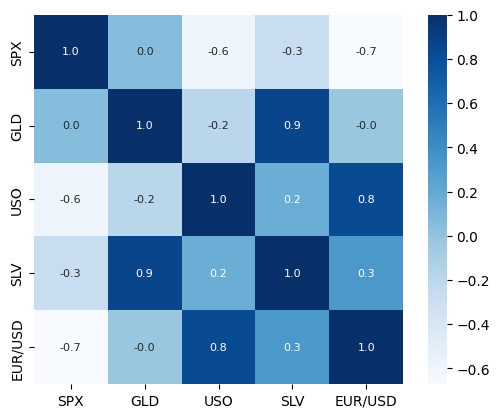

In [43]:
plt.Figure(figsize=(10,10))
sns.heatmap(correlation,cmap='Blues',fmt='.1f',square=True,cbar=True,annot_kws={'size':8},annot=True)

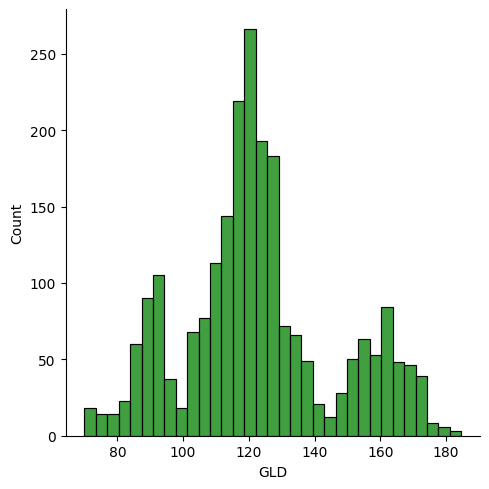

In [44]:
sns.displot(gld['GLD'],color='green')

In [48]:
X = gld.drop(columns=['GLD','Date'],axis=1)
Y = gld['GLD']

In [50]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [51]:
X_train , X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [52]:
model = RandomForestRegressor()

In [53]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [57]:
train_pred= model.predict(X_test)

In [59]:
mse = mean_squared_error(Y_test,train_pred)
print(mse)
r2 = r2_score(Y_test,train_pred)
print(r2)

5.57819469440976
0.9894240905661036
